In [3]:
HEAD_PATH = "d:/intern"

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [4]:
DATA_PATH = HEAD_PATH + "/pkl tick/"

- set working directory

In [5]:
import os
os.chdir(DATA_PATH)

- number of cores

In [6]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16


- get working directory

In [7]:
os.getcwd()

'd:\\intern\\pkl tick'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [8]:
product_list = ["rb", "hc", "i", "j", "jm"]
product = product_list[0]

- directory of the product's data

In [9]:
dire = DATA_PATH + product
dire

'd:/intern/pkl tick/rb'

- get all available data

In [10]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 915

915

- we can see that there are 915 days
- all of the products have the same trading days
- so we just take rb as an example
- get first several dates

In [11]:
all_dates[:6]
# ['20151202.pkl',
#  '20151203.pkl',
#  '20151204.pkl',
#  '20151207.pkl',
#  '20151208.pkl',
#  '20151209.pkl']


['20151202.pkl',
 '20151203.pkl',
 '20151204.pkl',
 '20151207.pkl',
 '20151208.pkl',
 '20151209.pkl']

- get last several dates

In [12]:
all_dates[-6:]
# ['20190822.pkl',
#  '20190823.pkl',
#  '20190826.pkl',
#  '20190827.pkl',
#  '20190828.pkl',
#  '20190829.pkl']

['20190822.pkl',
 '20190823.pkl',
 '20190826.pkl',
 '20190827.pkl',
 '20190828.pkl',
 '20190829.pkl']

- specify a date

In [13]:
date = "20180411"

- loading data set

In [46]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [47]:
data.columns
## contract: contract name, product+expiration date
## date.time: date and time
## price: newest price of data
## cum.open.int: cumulative open interest
## open.int: newest open interest increment
## turnover: newest turnover increment
## qty: newest trading volume
## bid: bid price
## ask: ask price
## bid.qty: bid size
## ask.qty: ask size
## date: actual date
## time: acutal time
## milli: actual milli second
## mid.price: middle price of bid and ask
## buy.trade: active buy volume at level 1
## buy2.trade: active buy volume at other levels
## sell.trade: active sell volume at level 1
## sell2.trade: active sell volume at other levels
## log.price: log wpr (to be defined soon)
## ret: log return of last tick
## wpr: volume weighted price
## wpr.ret: price change of wpr
## high: highest price of last ask, last price, and this ask
## low: lowest price of last bid, last price, and thsi bid
## next.bid: estimated active sell price, used for backtesting
## next.ask: estimated active buy price, used for backtesting
## min.1024: rolling minimum of wpr over 1024 ticks
## max.1024: rolling maximum of wpr over 1024 ticks
## min.2048: rolling minimum of wpr over 2048 ticks
## max.2048: rolling maximum of wpr over 2048 ticks
## min.4096: rolling minimum of wpr over 4096 ticks
## max.4096: rolling maximum of wpr over 4096 ticks

## Q：关于这个数据的每个 column 的含义，能否介绍一下？一些缩写我不太了解什么含义？
## A：各名称含义如下：
## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；
## min.1024: 1024跳滚动最低价
## max.1024: 1024跳滚动最高价
## min.2048: 2048跳滚动最低价
## max.2048: 2048跳滚动最高价
## min.4096: 4096滚动最低价
## max.4096: 4096滚动最高价

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'mid.price', 'buy.trade', 'buy2.trade', 'sell.trade',
       'sell2.trade', 'log.price', 'ret', 'wpr', 'wpr.ret', 'next.ask',
       'next.bid', 'min.1024', 'max.1024', 'min.2048', 'max.2048', 'min.4096',
       'max.4096'],
      dtype='object')

- plot the price

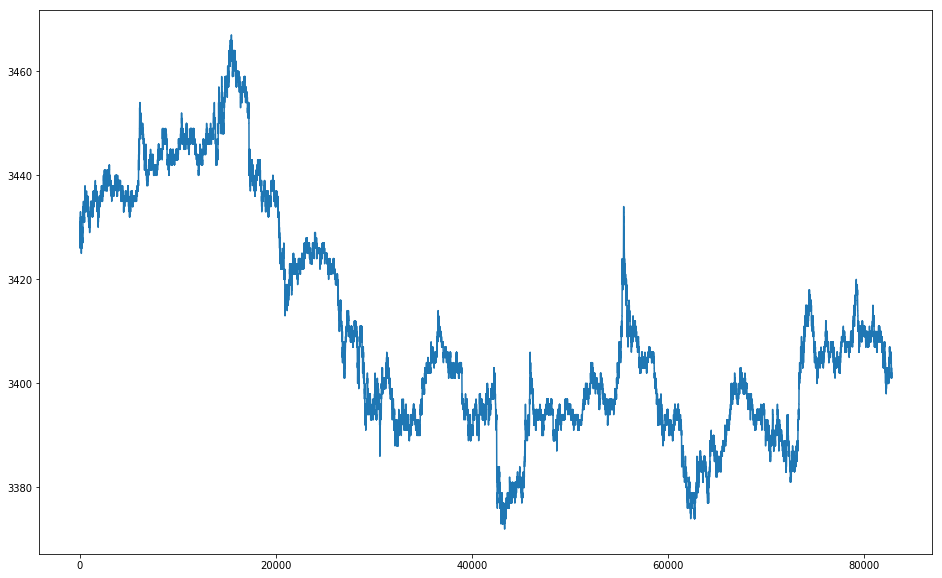

In [48]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

- specific a range of price

In [50]:
range_ = (data["time"] >="09:00:00") & (data["time"]<"15:00:02") 

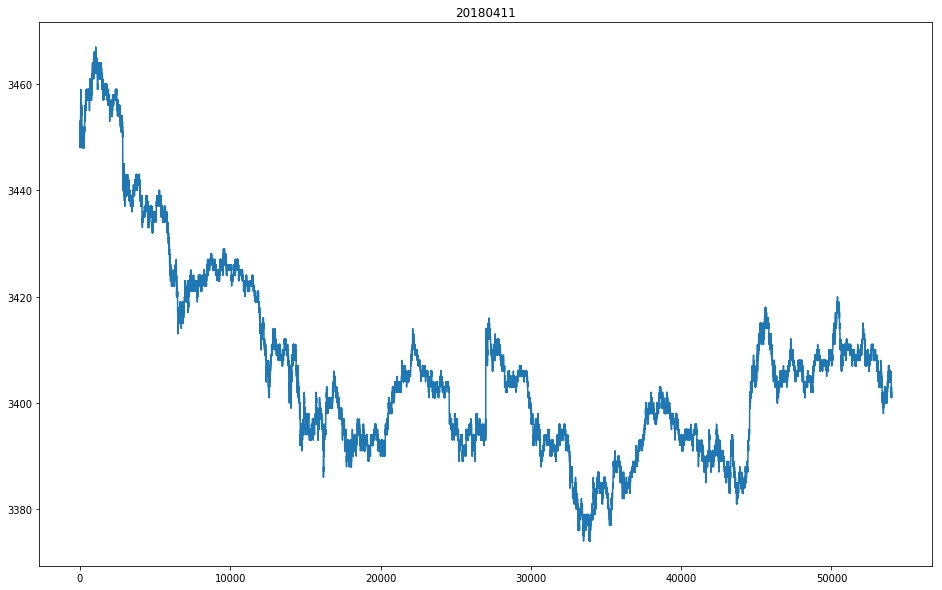

In [51]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["price"][range_].values);

- add time

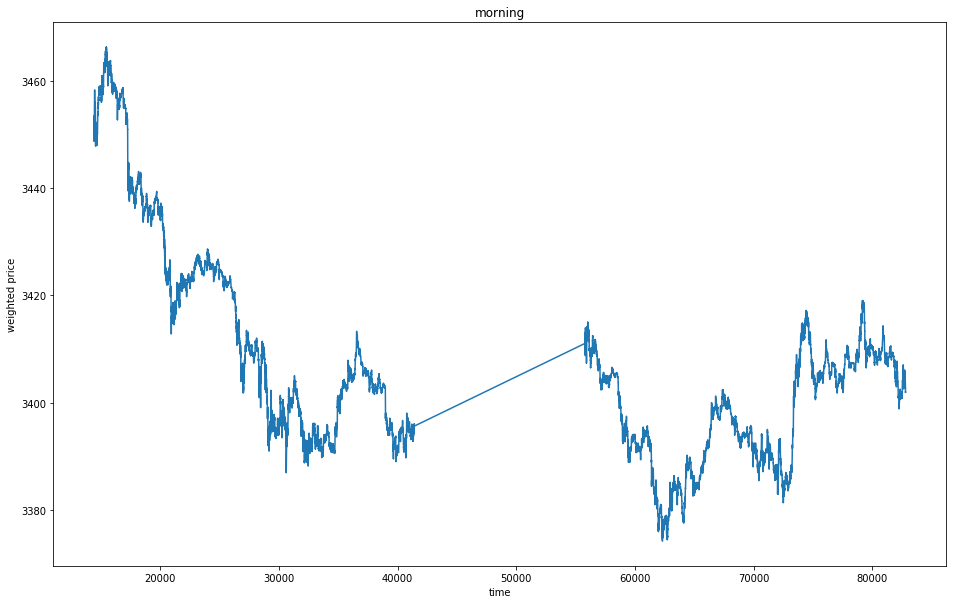

In [19]:
plt.figure(1, figsize=(16, 10))
plt.title("morning")
plt.xlabel("time")
plt.ylabel("weighted price")
plt.plot(data.index[range_].values, data["wpr"][range_].values);
## there is a break between 11:30 and 13:30

- plot price change

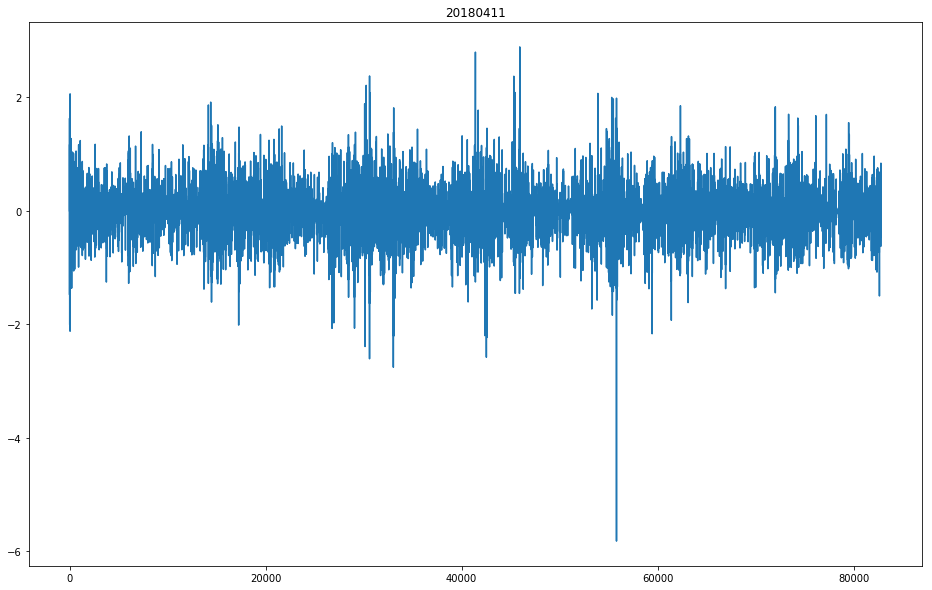

In [20]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

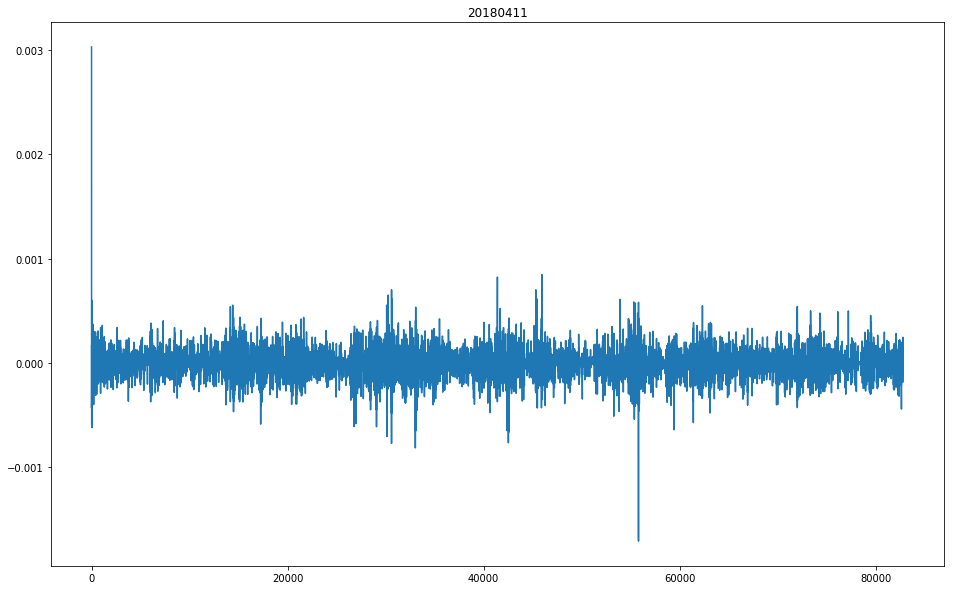

In [21]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [22]:
sum(data['ret']>0)
## 41066

41066

- count the number of falling ticks

In [23]:
sum(data['ret']<0)
## 41017

41017

- count the number of total ticks

In [24]:
len(data)
## 82799

82799

- formula to calculate wpr:

In [25]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [26]:
limit = (data["ask.qty"]==0) | (data["bid.qty"]==0)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [27]:
wpr[limit] = data["price"][limit]

In [28]:
wpr.head()
# 0    3429.368217
# 1    3430.997788
# 2    3431.373134
# 3    3432.195072
# 4    3431.302326
# dtype: float64

0    3429.368217
1    3430.997788
2    3431.373134
3    3432.195072
4    3431.302326
dtype: float64

In [29]:
data["wpr"].head()
# 0    3429.368217
# 1    3430.997788
# 2    3431.373134
# 3    3432.195072
# 4    3431.302326
# Name: wpr, dtype: float64

0    3429.368217
1    3430.997788
2    3431.373134
3    3432.195072
4    3431.302326
Name: wpr, dtype: float64

In [30]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [31]:
import statsmodels.tsa.stattools as ts

In [32]:
result = ts.adfuller(data["ret"][data["good"]], maxlag=int(pow(len(data["ret"][data["good"]])-1,(1/3))), regression='ct', autolag=None)
result
# (-33.76210632343728,
#  0.0,
#  34,
#  41362,
#  {'1%': -3.958988891431167,
#   '5%': -3.4105961510199676,
#   '10%': -3.127112513778515})

## for this test the smaller the value the more stationary it is
## our value is -33.76, less than 1% which is -3.95
## so it's stationary

(-33.76210632343728,
 0.0,
 34,
 41362,
 {'1%': -3.958988891431167,
  '5%': -3.4105961510199676,
  '10%': -3.127112513778515})

In [33]:
result = ts.kpss(data["ret"][data["good"]], regression='c', lags=int(3*math.sqrt(len(data["ret"][data["good"]]))/13))
result

# (0.3564012301601655,
#  0.09594774562061831,
#  46,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## for KPSS test, small value means level, stationary, large value means trend
    ## the value is 0.3564 smaller than 5% 0.463, so it's level stationary

(0.3564012301601655,
 0.09594774562061831,
 46,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [34]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [34]:
sum(data["ret"][0:120])
## 0.0035976220649676072

0.0035976220649676072

In [35]:
ret_120.iloc[0]
## 0.0035976220649676072

0.0035976220649676072

- plot the price movements of 120 ticks

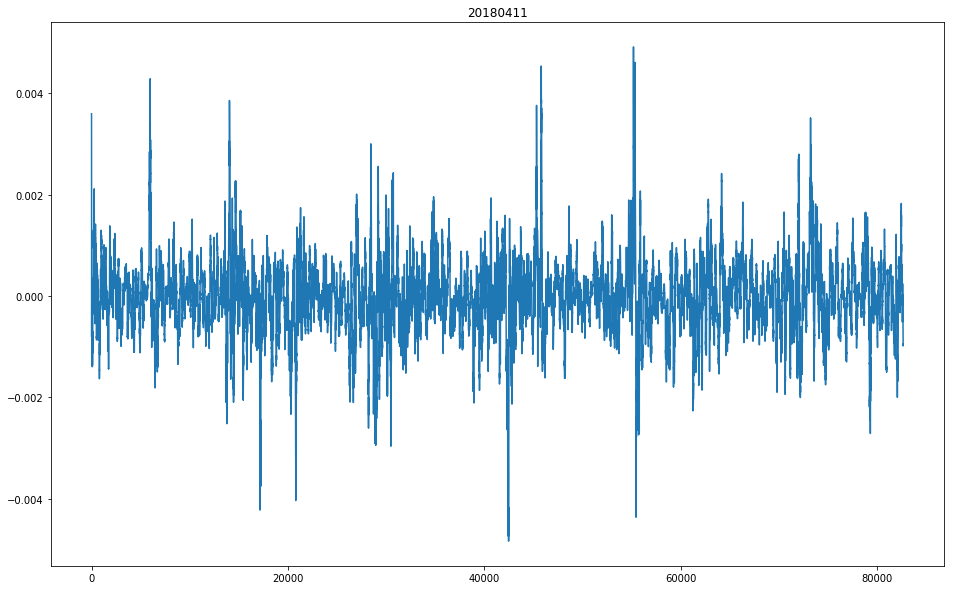

In [36]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [37]:
len(ret_120)
## 0.0035976220649676072

82680

In [38]:
len(data)
## 82799

82799

In [39]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0) & data["good"])[119:]

In [40]:
len(ret_120)
## 82680

82680

In [41]:
ret_120.iloc[np.where(range_120)]

14401    1.212355e-03
14521   -1.778871e-03
14641    1.694775e-03
14761    9.473378e-04
14881    1.874918e-04
15001    8.885138e-05
15121    1.236714e-03
15241    2.781794e-04
15361    1.970938e-04
15481   -9.282200e-04
15601    1.859887e-04
15721    1.474040e-05
15841   -1.204326e-03
15961    3.239212e-04
16081   -2.126809e-04
16201   -5.175615e-04
16321   -4.368645e-04
16441   -7.438507e-07
16561    4.692278e-04
16681    1.955431e-04
16801   -6.051795e-04
16921   -2.282914e-04
17041   -7.751873e-04
17161   -2.483460e-03
17281   -1.323983e-03
17401    2.737985e-04
17521    3.091713e-04
17641   -6.825016e-04
17761    8.486543e-06
17881    3.736721e-04
             ...     
52081    1.278936e-03
52201   -5.204256e-04
52321   -1.568280e-04
52441   -4.776303e-04
52561    8.604795e-05
52681   -1.509591e-04
52801   -3.390041e-04
52921   -5.878857e-04
53041    1.375417e-03
53161   -1.767949e-05
53281   -1.028760e-03
53401    1.053141e-05
53521   -1.024064e-03
53641    4.198512e-04
53761   -7

- test whether ret.120 is stationary

In [42]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-6.755523184938173,
#  5.010687708166179e-08,
#  6,
#  337,
#  {'1%': -3.9858876182413634,
#   '5%': -3.423598642683739,
#   '10%': -3.134757548798489})

(-6.755523184938173,
 5.010687708166179e-08,
 6,
 337,
 {'1%': -3.9858876182413634,
  '5%': -3.423598642683739,
  '10%': -3.134757548798489})

In [43]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', lags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.366310997419579,
#  0.0916762942156987,
#  4,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary under 5%

(0.366310997419579,
 0.0916762942156987,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [44]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

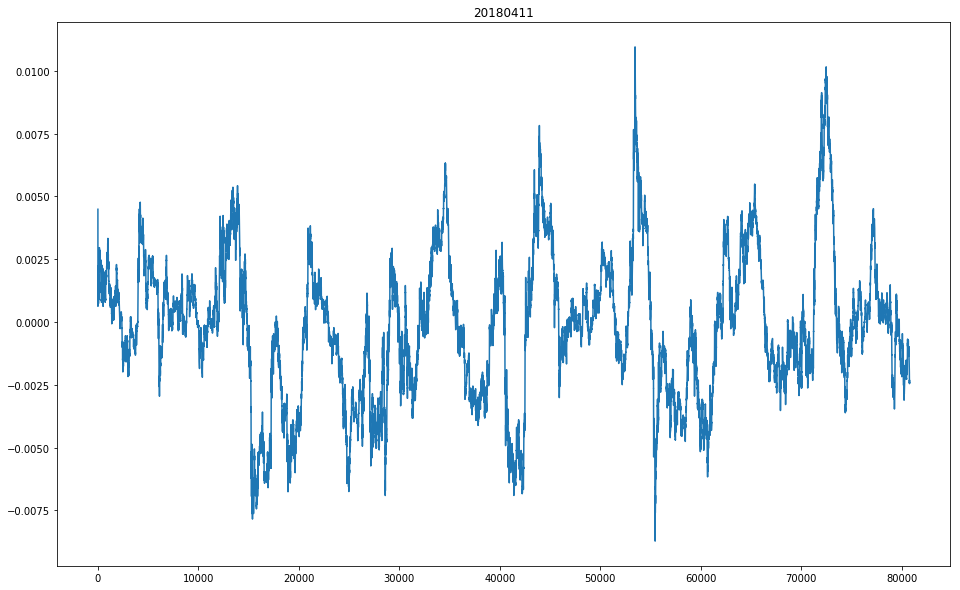

In [45]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [46]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0) & (data["good"]))
## 20

20

- So there are too few points to test for stationary

In [35]:
import pandas as pd
import _pickle as cPickle
import gzip

In [36]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

- there may be too few data
- we can check for more days

In [37]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0) & data["good"])[(period-1):]
    return ret.iloc[np.where(range)]


In [38]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [52]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time:2min 21s

Wall time: 2min 21s


In [53]:
from itertools import chain 

In [54]:
ret_long = list(chain.from_iterable(result)) 

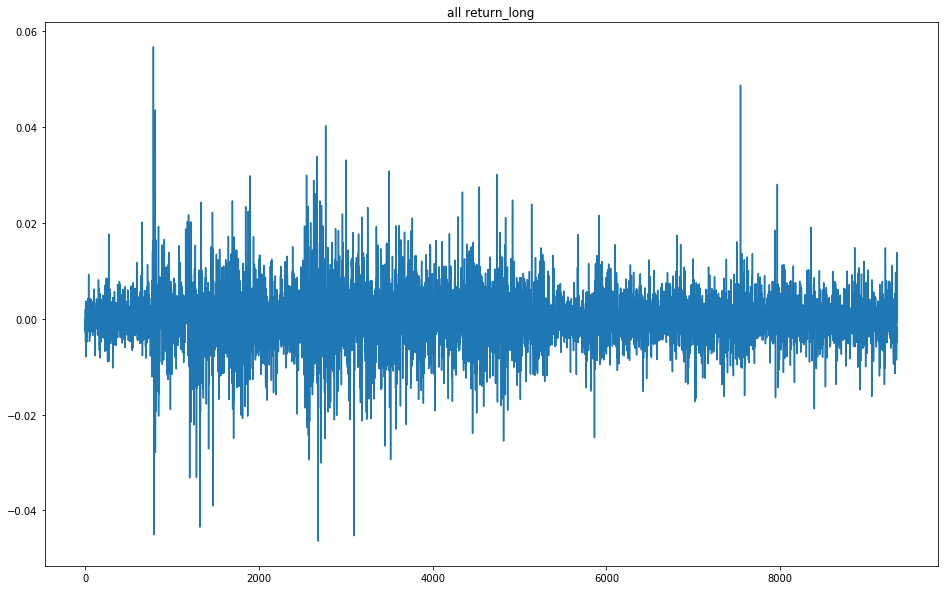

In [55]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [57]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-20.62003343409217,
#  0.0,
#  21,
#  9325,
#  {'1%': -3.959741168913875,
#   '5%': -3.4109609243463646,
#   '10%': -3.127327321304976})

## it's still stationary

(-20.62003343409217,
 0.0,
 21,
 9325,
 {'1%': -3.959741168913875,
  '5%': -3.4109609243463646,
  '10%': -3.127327321304976})

In [58]:
result = ts.kpss(ret_long, regression='c', lags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.13522424455699192,
#  0.1,
#  22,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## p-value is 0.135 so it's stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.13522424455699192,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [59]:
threshold = 0.001
len(ret_long)
# 9347

9347


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [60]:
sum(np.array(ret_long)>threshold)
## 3685

3685

- number of ticks below negetive threshold, to be short position

In [61]:
sum(np.array(ret_long)< -threshold)
## 3483

3483

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [52]:
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data)
    data=ori_data[ori_data["good"]]
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = ((change_pos>0) & (np.array(data["next.ask"])>0))
    change_sell = ((change_pos<0) & (np.array(data["next.bid"])>0))
    change_base[change_buy] = (np.array(data["next.ask"])[change_buy])*(1+tranct)
    change_base[change_sell] = (np.array(data["next.bid"])[change_sell])*(1-tranct)
    change_buy = ((change_pos>0) & (np.array(data["next.ask"])==0))
    change_sell = ((change_pos<0) & (np.array(data["next.bid"])==0))
    change_base[change_buy] = (np.array(data["price"])[change_buy])*(1+tranct)
    change_base[change_sell] = (np.array(data["price"])[change_sell])*(1-tranct)
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [53]:
import dask
from dask import compute, delayed

get_daily_pnl_fast(all_dates[0], product="rb", period=4096, threshold=0.001, tranct=1.1e-4)
# OrderedDict([('date', '20151202.pkl'),
#              ('final.pnl', -48.4886800000138),
#              ('turnover', 258988.00220000002),
#              ('num', 78),
#              ('hld.period', 36631)])

OrderedDict([('date', '20151202.pkl'),
             ('final.pnl', -48.4886800000138),
             ('turnover', 258988.00220000002),
             ('num', 78),
             ('hld.period', 36631)])

- Then we use it for all days

In [55]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="rb", period=4096, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 42 s


- Now we can use a function to check its performance

In [54]:
from collections import OrderedDict
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index("date", inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat["final.pnl"].cumsum()
    date_str = [n[0:8] for n in row_names]
    date_format = [pd.to_datetime(d) for d in date_str]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat["num"].mean()
    if num==0:
        return;
    if (stat["final.pnl"].std()==0):
        sharpe = 0
    else:
        sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
   
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])/spread
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-6.661337,-0.999843,-1.000157,0.022951,147.978142,-2.280053,194.63726


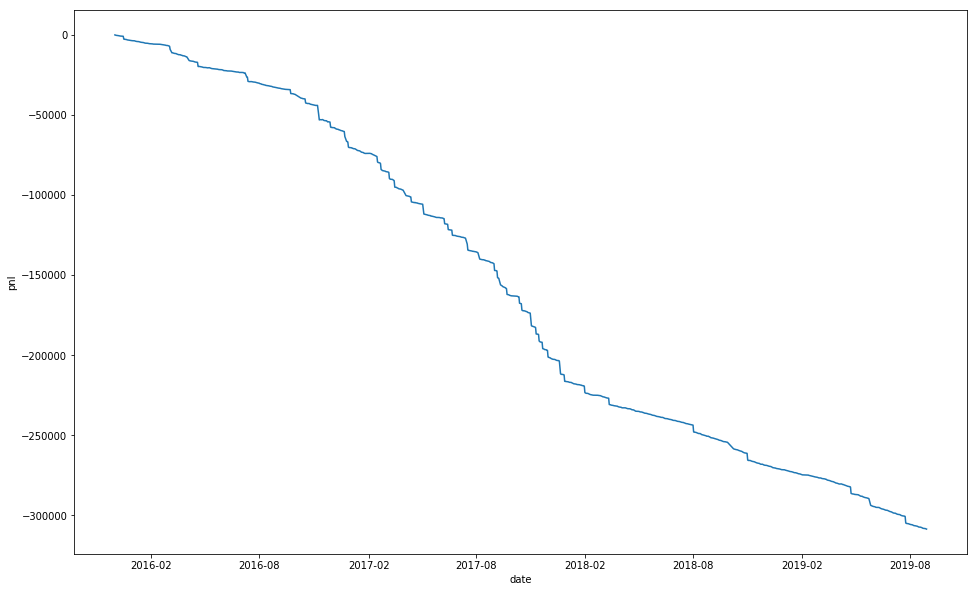

In [56]:
pd.DataFrame(get_performance(result, 1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-6.661337 	-0.999843 	-1.000157 	0.022951 	147.978142 	-2.280053 	194.63726

- we can see it's really bad
- we can try increasing threshold

In [57]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="rb", period=4086, threshold=0.01, tranct=1.1e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 41.7 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-2.31381,-1.0,-1.0,0.126776,19.486339,-2.320019,108.149635


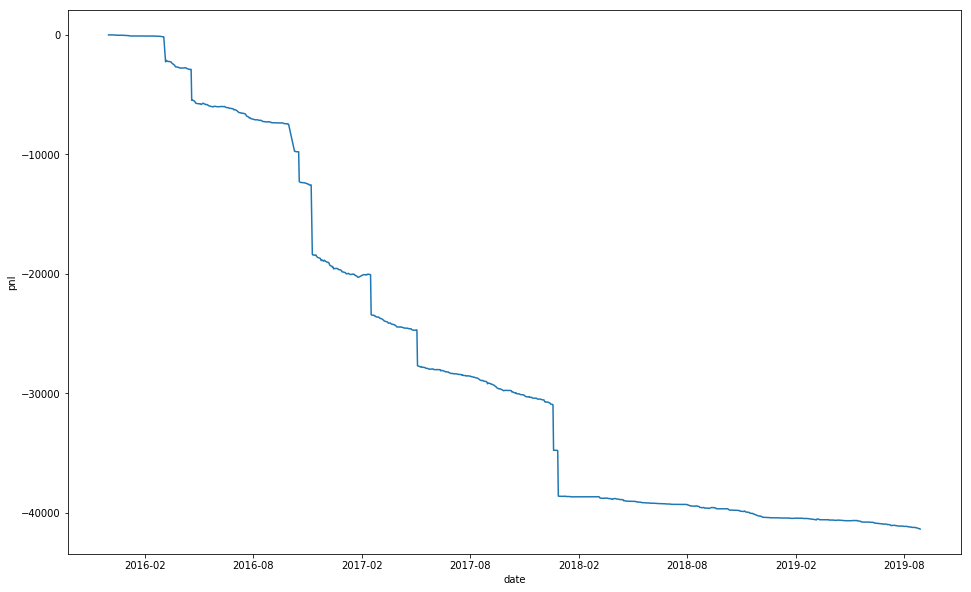

In [58]:
pd.DataFrame(get_performance(result_2), index=[0])

# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-2.31381 	-1.0 	-1.0 	0.126776 	19.486339 	-2.320019 	108.149635

In [59]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="rb", period=4096, threshold=0.02, tranct=1.1e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 42.8 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-1.027964,-1.0,-1.0,0.040437,2.645902,-3.693451,88.335812


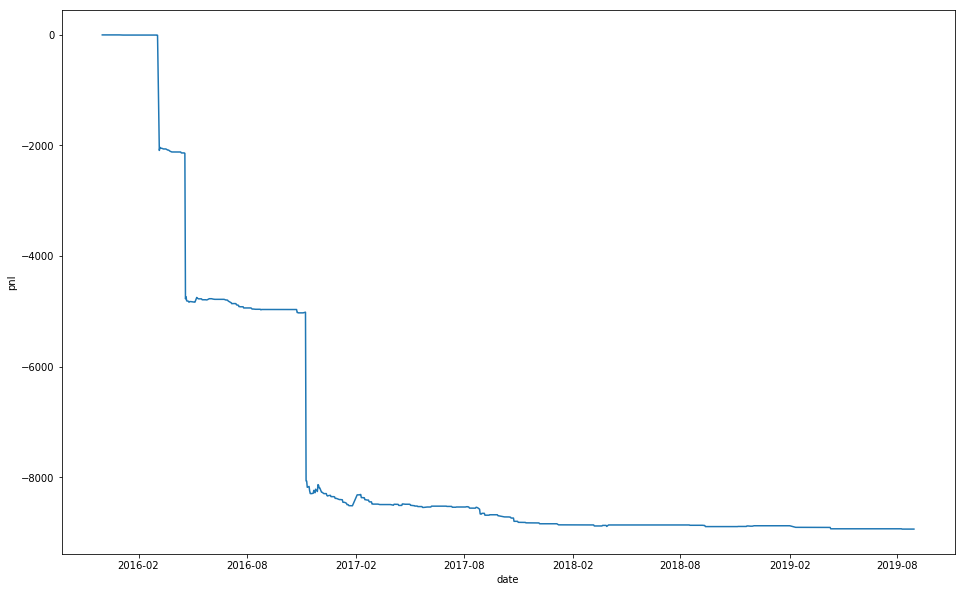

In [60]:
pd.DataFrame(get_performance(result_3, 1), index=[0])
# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-1.027964 	-1.0 	-1.0 	0.040437 	2.645902 	-3.693451 	88.335812

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [61]:
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy & data["next.ask"]>0] = (data["next.ask"][change_buy & data["next.ask"]>0])*(1+tranct)
    change_base[change_buy & data["next.ask"]==0] = (data["price"][change_buy & data["next.ask"]==0])*(1+tranct)
    change_base[change_sell & data["next.bid"]>0] = (data["next.bid"][change_sell & data["next.bid"]>0])*(1-tranct)
    change_base[change_sell & data["next.bid"]==0] = (data["price"][change_sell & data["next.bid"]==0])*(1-tranct)
    
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [62]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="rb", period=4096, threshold=0.001, tranct=1.1e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 51 s

Wall time: 56.3 s


- the col names and row names are opposite

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,34.254396,0.0,inf,1.0,16.436066,7.941277,2563.527761


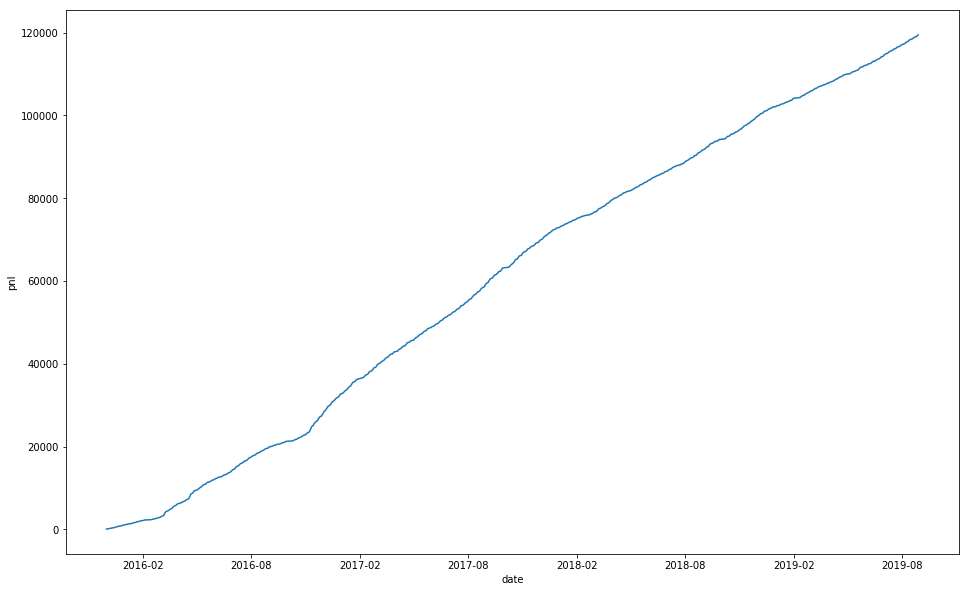

In [63]:
pd.DataFrame(get_performance(result_4,1), index=[0])
#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	34.254396 	0.0 	inf 	1.0 	16.436066 	7.941277 	2563.527761

- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [64]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="rb", period=4096, threshold=0.002, tranct=1.1e-4, noise=5)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 51.9 s

Wall time: 54.5 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,36.697001,0.000845,1183.411765,0.998907,18.744262,7.037183,2245.6318


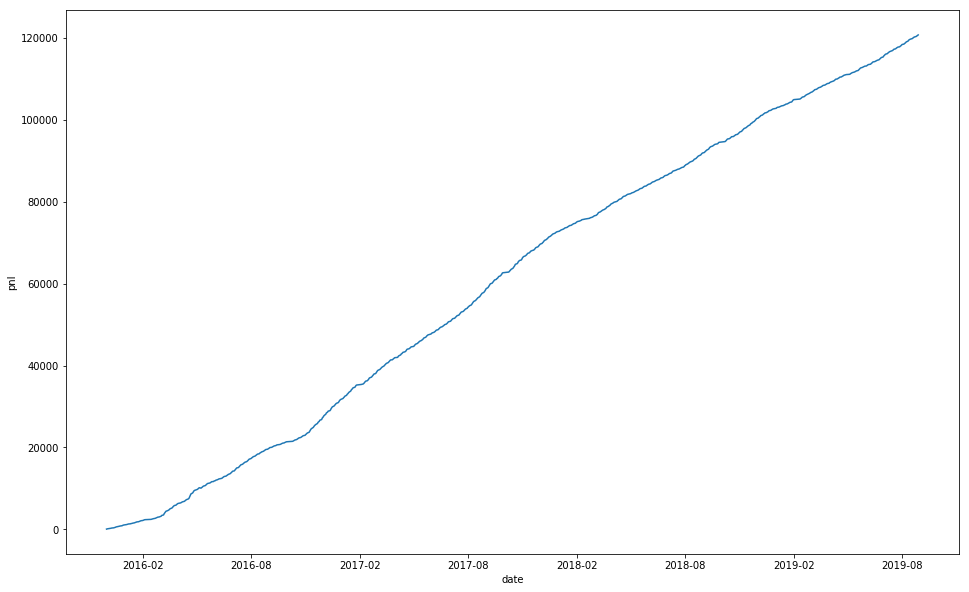

In [65]:
pd.DataFrame(get_performance(result_5,1), index=[0])
# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	36.697001 	0.000845 	1183.411765 	0.998907 	18.744262 	7.037183 	2245.6318

- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products: hc, i, j, jm and comapre their results|